'2.91 sec'

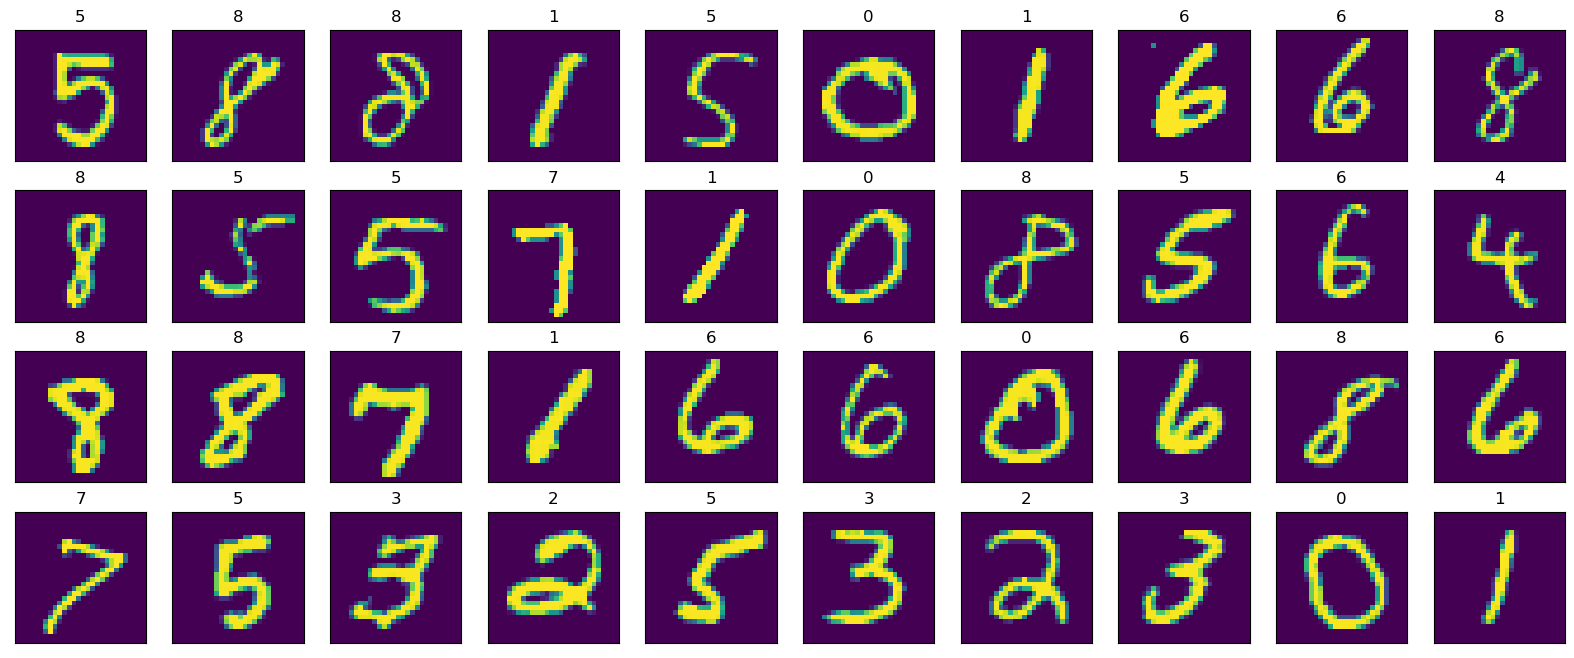

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import datasets,transforms
from matplotlib import pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
import time
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

"""
transforms.ToTensor() 将图像转换为 32 位浮点数，并将像素值除以 255，使其在 0~1 之间。
使用 torchvision.datasets.MNIST 加载 MNIST 数据集，
train=True 表示加载训练数据集，
train=False 表示加载测试数据集，
transform=trans 表示应用预处理的转换操作。
"""
trans=transforms.ToTensor() #transforms.ToTensor()图片转化为32位浮点数 并且除以255使其在0~1之间
mnist_train = torchvision.datasets.MNIST(root='../data', train=True, download=False, transform=trans) 
mnist_test = torchvision.datasets.MNIST(root='../data', train=False, download=False, transform=trans)

def get_fashion_labels(labels):
    """返回MNIST中的文本标签"""
#     text_labels = ["t-shirt", "trouser","pullover", "dress", "coat", "sandal" ,"shirt", "sneaker", "bag" ,"ankle boot"]
    text_labels = ["0", "1", "2", "3", "4", "5" ,"6", "7", "8" ,"9"]
    return [text_labels[int(i)] for i in labels]

# 输出了训练数据集的第一个样本的形状，即图像的形状。MNIST 数据集中的图像大小为 28x28
# mnist_train[0][0].shape

"""
show_images，可视化图像。
它接受图像列表 imgs、行数 num_rows、列数 num_cols、
可选的标题列表 titles 和缩放比例 scale。
函数通过 matplotlib 绘制图像，并设置坐标轴的可见性和标题。
"""
def show_images(imgs,num_rows,num_cols,titles=None,scale=2):
    """绘制图像列表"""
    figsize = (num_cols * scale,num_rows * scale) # 设置画布的大小
    
    #  _ 表示临时变量     plt.subplots返回两个值，figure，axes
    _,axes = plt.subplots(num_rows,num_cols,figsize=figsize)
    
    axes = axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        #根据图像的格式绘制图像
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            #PIL格式的图像直接绘制
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
        if titles:
            ax.set_title(titles[i])
    
    return axes

"""
这部分代码用于测试 show_images 函数。batch_size=展示多少数据
通过 data.DataLoader 和 next(iter(...)) 获取训练数据集的一个批次，
并将图像和标签分别存储在 X 和 y 中。然后调用 show_images 函数将图像可视化，
并使用 get_fashion_labels 函数将标签转换为文本标签
"""
X,y = next(iter(data.DataLoader(mnist_train,shuffle=True,batch_size=40)))
show_images(X.reshape(40,28,28),4,10,titles=get_fashion_labels(y))

"""
计时器 Timer，用于计算代码块的执行时间。
它包含 times 属性用于存储每次计时的时间，start 方法用于开始计时，stop 方法用于停止计时并返回执行时间。
"""
class Timer:
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        self.tik = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
#批次大小 batch_size，决定了每次从数据集中读取的样本数量
batch_size = 512

#小批量读取数据
def  get_dataloader_worker():
    """使用多少个进程读取图像"""
    return 2

"""
创建了一个数据迭代器 train_iter，用于以随机顺序从训练数据集中读取批次大小为 batch_size 的图像数据。
shuffle=True 表示每个 epoch 都会对数据进行随机洗牌，
num_workers=get_dataloader_worker() 表示使用 get_dataloader_worker 函数返回的进程数量来读取图像。
"""
train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_worker())

"""
使用计时器 timer 计算从训练数据集中读取所有批次的时间。
通过迭代 train_iter，读取每个批次的图像数据，并忽略其内容。
最后，计时器的 stop 方法返回总共花费的时间，保留两位小数。
"""
timer = Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f} sec'

AssertionError: 0.8500774010976155

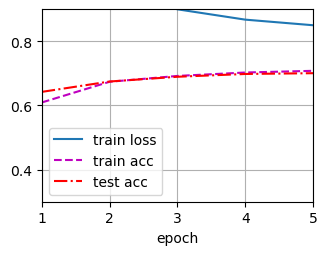

In [2]:
from torchvision.transforms import Compose, RandomRotation, RandomHorizontalFlip, RandomResizedCrop

#改写整合数据读取组件，实现数据加载和随机小批量读取
def load_fashion_mnist(batch_size,resize=None):
    """下载数据集，加载到内存"""

#     定义数据增强变换
    transform = Compose([
        RandomRotation(10),
        RandomHorizontalFlip(0.5),
        RandomResizedCrop(28, scale=(0.8, 1.2)),
    ])
    mnist_train=torchvision.datasets.FashionMNIST(root='../data',train=True,transform=Compose([transforms.ToTensor(), transform]),download=False)
    mnist_test=torchvision.datasets.FashionMNIST(root='../data',train=False,transform=Compose([transforms.ToTensor(), transform]),download=False)

#     trans=[transforms.ToTensor()]#transforms.ToTensor()图片转化为32位浮点数 并且除以255使其在0~1之间
#     if resize:
#         trans.insert(0,transforms.Resize(resize))
#     trans=transforms.Compose(trans)

#     mnist_train=torchvision.datasets.FashionMNIST(root='../data',train=True,transform=trans,download=False)
#     mnist_test=torchvision.datasets.FashionMNIST(root='../data',train=False,transform=trans,download=False)

    return data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_worker()),data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=get_dataloader_worker())

# batch_size=512
batch_size=256

#测试
# train_iter,test_iter=load_fashion_mnist(batch_size,resize=64)
train_iter,test_iter=load_fashion_mnist(batch_size) #不能整除
for X, y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

#实现softmax模型
#初始化模型的参数
"""
使用固定长度的向量表示样本，一个图片有28*28个像素，所以看成是28*28=784的向量
在softmax中，输出个数和种类一样多，所以神经网络输出的维度是10(10种衣服)
所以权重构成一个784*10的矩阵，偏置构成1*10的向量，X有7840个
"""
num_inputs,num_outputs=784,10
#是PyTorch中的一个函数，用于生成服从标准正态分布的随机数张量。
"""
torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
*size：表示生成的随机张量的形状，可以是一个整数，或者是一个整数序列。
out：可选参数，用于指定输出张量的位置。
dtype：可选参数，用于指定输出张量的数据类型。
layout：可选参数，用于指定输出张量的布局。
device：可选参数，用于指定输出张量的设备。
requires_grad：可选参数，用于指定输出张量是否需要梯度计算。
"""
# W=torch.randn(num_inputs, num_outputs) #10x784
# b=torch.randn(num_outputs) #1x10

W=torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True) #正太分布生成
b=torch.zeros(num_outputs,requires_grad=True)

"""
定义softmax函数

softmax的实现步骤：
1 对每一项求幂（使用exp函数）
2 对每一个行求和，得到每一个样本的规范化常数
3 将每一行除以规范化常数，以确保结果的和为1

sum() 默认求所有元素的和
1表示对X_preb的每一行进行求和。 0对列求和
keepdims 结果将保持与输入张量相同的维度；当keepdims=False时，结果将降低维度
torch.exp(X) 对每一项计算e^xi
X=[1.0, 2.0, 3.0] torch.exp(X)=[2.7183, 7.3891, 20.0855]
"""
# X=torch.tensor([[1.0,2.0,3.0],
#                 [45.0,56,89]])
# print(X.sum(0,keepdims=True))
# print(X.sum(1,keepdims=True))

def softmax(X):
    # 对每一条记录求幂
    X_preb = torch.exp(X)
    # 对每一条记录求和
    patition = X_preb.sum(1, keepdims=True)
    # 对每一条记录除以求和
    return X_preb / patition

X=torch.normal(0,1,(2,5)) # 中心0，差1，形状(2,5)的正态分布
X_preb=softmax(X)
print(X_preb)
print(X_preb.sum(1))

#定义模型,实现输入到输出的映射
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+b)

#定义损失函数 交叉熵损失函数
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

#测试损失函数
y=torch.tensor([0,2]) #真实的值，第一位是0，第二位是2
y_hat=torch.tensor([[0.1,0.2,0.7],[0.3,0.2,0.5]]) # 取最大[2,2]=[0,1] 下标一对一错 0.5
print("cross_entropy:",cross_entropy(y_hat,y))

"""
求模型的精度：预测正确的数量与总预测数的比值
"y_hat表示预测值（概率分布）。"
"当预测的结果和分类的标签y一致时，就表示预测是正确的。"
"直接优化精度是比较困难的。（精度不能求导）"
"可以通过一下操作求精度："
"y_hat是一个矩阵，可以使用第二个维度来存储每个类的预测的分数。求每一行中最大的预测值所对应的元素"
"0",  "1",  "2",  "3",  "4",  "5",  "6",  "7",  "8",  "9"
 0.05 0.01  0.6       ...
然后用值最大的元素跟真实的标签对比，结果包含一组0错1对的数据
"""

"""
这个函数计算预测结果 y_hat 与真实标签 y 的准确率。
如果 y_hat 是一个二维张量且第二个维度大于 1,表示有多个类别,则需要取每个样本的最大值作为预测类别。
然后比较预测类别与真实类别是否相同,并统计正确预测的数量。
最后返回正确预测的数量除以总样本数的比例,即准确率。
"""
def accuracy(y_hat,y):
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat=y_hat.argmax(axis=1)
    cmp=y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())

print(accuracy(y_hat,y)/len(y))

"""
这个类用于累加 n 个变量的值。
在初始化时,会创建一个长度为 2*n 的列表,存储 n 个变量的值及其平方。
"""
class Accumulator:
    """在n个变量上累加"""
    def __init__(self,n):
        self.data=[0,0] * n #重新设置0

    def add(self,*args):
        self.data=[a + float(b) for a,b in zip(self.data, args)]

    def reset(self):
        self.data=[0,0] * len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]


#求任意模型的精确度
def evaluate_accuracy(net,data_iter):
    #判断是否属于神经网络模型 torch.nn.Module所有的神经网络
    if isinstance(net,torch.nn.Module):
        net.eval() #模型设置为评估模式
    metric=Accumulator(2) #计算正确的预测数 总预测数

    with torch.no_grad():
        for X,y in data_iter:
            #在不进行梯度更新的情况下(torch.no_grad()),遍历数据集,计算每个批次的准确率,并累加到 Accumulator 中。
            metric.add(accuracy(net(X),y),y.numel()) #计算的数量，总数
    #最后,返回正确预测的数量除以总预测数量,即模型在给定数据集上的准确率
    return metric[0]/metric[1]

"""
小批量随机梯度下降(Stochastic Gradient Descent, SGD)的函数。作用是更新模型参数 params
"""
def sgd(params, lr, batch_size):
    #save
    #上下文管理器,在这里不需要计算梯度。因为只需要更新参数,不需要计算梯度。
    with torch.no_grad():
        """
        对于每个参数 param,将其更新为 param - lr * param.grad / batch_size。
        lr 是学习率,控制着每次参数更新的步长。
        param.grad 是该参数的梯度,表示该参数对损失函数的敏感度。
        batch_size 是小批量的大小,用于将梯度除以小批量的样本数,得到平均梯度。
        更新完参数后,将该参数的梯度 param.grad 清零,为下一次迭代做准备。
        """
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

#训练模型 未优化
# def train_epoch(net, train_iter, loss, updater):
#     #save
#     """训练模型的一个迭代周期"""
#     if isinstance(net, torch.nn.Module): #将模型设置为训练模式
#         net.train()
#     metric = Accumulator(3) #训练损失总和、训练的精度的总和、总样本数
#     for X,y in train_iter:
#         #计算梯度并且更新参数
#         y_hat = net(X)
#         l = loss(y_hat, y)
#         if isinstance(updater, torch.optim.Optimizer): #使用内置的优化器
#             updater.zero_grad()
#             l.mean().backward()
#             updater.step()

#     metric[0] += accuracy(y_hat, y)
#     metric[1] += y.numel()
#     metric[2] += l.sum()

#     return metric[0] / metric[2], metric[1] / metric[2]

"""
这种自定义优化器的方式有几个好处:

灵活性:通过将学习率 lr 作为一个可配置的参数,可以在不同的训练场景中使用不同的学习率。这样可以帮助模型在训练过程中更好地收敛。
可重用性:将更新参数的逻辑封装在 updater(batch_size) 函数中,可以在不同的模型训练中重复使用这个优化器。这样可以提高代码的复用性和可维护性。
抽象化:通过定义一个返回更新函数的 updater(batch_size) 函数,可以进一步抽象出优化器的概念。这种抽象化可以使代码更加模块化和易于理解
"""
lr=0.05 #学习率
def updater(batch_size):
    return sgd([W,b],lr,batch_size)

#训练模型
def train_epoch(net,train_iter,loss,updater):
    """训练模型的一个迭代周期"""
    if isinstance(net,torch.nn.Module):
        net.train() #将模型设置为训练模式
    #训练损失总和、训练的精度的总和、总样本数
    metric = Accumulator(3)
    for X,y in train_iter:
        #计算梯度并且更新参数
        y_hat = net(X)
        l = loss(y_hat,y)
        if isinstance(updater,torch.optim.Optimizer):#使用内置的优化器
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            #使用自定义的优化器
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()),accuracy(y_hat,y),y.numel())
    return metric[0]/metric[2],metric[1]/metric[2]

from IPython import display
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """设置坐标轴的属性"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

class Animator:
    """动态显示数据"""
    def __init__(self,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',
                 yscale='linear',fmt=('-','m--','r-.','g:'),nrows=1,ncols=1,figsize=(3.5,2.5)):
        # 绘制多条线
        if legend is None:
            legend = []
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # 使用lambda捕获参数
        self.config_axes = lambda: set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmt

    def add(self,x,y):
        #向图表中添加多个数据点
        if not hasattr(y,"__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x,"__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]

        for i,(a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()

        for x,y,fmt in zip(self.X,self.Y,self.fmts):
            self.axes[0].plot(x,y,fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)



#训练：在指定的数据集上训练模型net，这个训练函数会运行多个迭代周期。每一个迭代周期结束的时候，需要对模型进行评估
def train(net,train_iter,test_iter,loss,num_epochs,updater):
    """动态显示训练过程"""
    animator=Animator(xlabel='epoch',xlim=[1,num_epochs],ylim=[0.3,0.9],legend=['train loss','train acc','test acc'])
    for epoch in range(num_epochs):
        #调用 train_epoch 函数,对模型进行一轮训练,并获得训练损失和训练精度。
        train_metrics = train_epoch(net,train_iter,loss,updater)
        #调用 evaluate_accuracy 函数,计算模型在测试集上的精度。
        test_acc = evaluate_accuracy(net,test_iter)
        animator.add(epoch+1, train_metrics + (test_acc,))
    train_loss,train_acc = train_metrics
    """
    获取训练损失和训练精度,并使用 assert 语句检查它们是否满足预期:训练损失应小于 0.5。训练在 0.7 到 1.0。测试在 0.8 到 1.0。
    训练损失(training loss)是用于评估模型在训练过程中的性能的一个重要指标。它表示模型在训练集上的预测输出与真实标签之间的差距程度。
    """
    assert train_loss < 0.5,train_loss
    assert train_acc <=1 and train_acc > 0.7,train_acc
    assert test_acc <=1 and test_acc > 0.8,test_acc

num_epochs = 5
train(net,train_iter,test_iter,cross_entropy,num_epochs,updater)

#预测
def predict(net,test_iter,n=10):
    for X,y in test_iter:
        break
    #获取图片的真实标签
    trues = get_fashion_labels(y)
    #获取预测的标签
    preds = get_fashion_labels(net(X).argmax(axis=1))
    titlts = [true + '\n' + pred for true,pred in zip(trues,preds)]
    show_images(X[0:n].reshape((n,28,28)),1,n,title=titles[0:n])


test_iter # 定义好了测试集的迭代器
test_acc = evaluate_accuracy(net, test_iter)
print(f'Test accuracy: {test_acc:.2f}')

In [ ]:
# # 数据加载器 shuffle 参数表示是否对数据进行随机洗牌。
# train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# # 定义softmax回归模型
# """
# 定义了一个名为 SoftmaxRegression 的类，继承自 PyTorch 的 nn.Module。
# 这个类包含一个线性层 (nn.Linear)，将图像展平为一维向量，然后通过线性层进行分类预测。
# """
# class SoftmaxRegression(nn.Module):
#     def __init__(self):
#         super(SoftmaxRegression, self).__init__()
#         self.linear = nn.Linear(28*28, 10)

#     def forward(self, x):
#         x = x.view(x.size(0), -1)   # Flatten the image
#         x = self.linear(x)
#         return x

# # 实例化模型
# model = SoftmaxRegression()

# # 定义损失函数criterion和优化器optimizer
# """
# 定义了损失函数 criterion，在这里使用交叉熵损失函数 (nn.CrossEntropyLoss)，用于多分类任务。
# 定义了优化器 optimizer，在这里使用随机梯度下降 (optim.SGD)，用于更新模型的参数。
# """
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# # 训练模型
# """
# train 函数用于训练模型。
# 它遍历训练数据集的每个批次，计算模型的输出和损失，并使用反向传播更新模型的参数。
# model.train() 将模型设置为训练模式，
# optimizer.zero_grad() 将梯度清零，
# loss.backward() 进行反向传播计算梯度，
# optimizer.step() 更新模型参数。
# """
# def train(model, train_loader, criterion, optimizer, num_epochs):
#     model.train()  # 设置模型为训练模式
#     for epoch in range(num_epochs):
#         for batch_idx, (data, target) in enumerate(train_loader):
#             optimizer.zero_grad()  # 梯度清零
#             output = model(data)  # 前向传播
#             loss = criterion(output, target)  # 计算损失
#             loss.backward()  # 反向传播，计算梯度
#             optimizer.step()  # 更新模型参数
#             if batch_idx % 100 == 0:
#                 print(f'Epoch {epoch}, Batch {batch_idx}, Loss: {loss.item()}')

# # 测试模型
# """
# test 函数用于测试模型。
# 它计算模型在测试数据集上的损失和准确率。
# model.eval() 将模型设置为评估模式，
# torch.no_grad() 确保在测试过程中不计算梯度，以节省内存和计算资源。
# 函数中的计算包括前向传播、计算损失、获取预测结果和统计正确预测的数量。
# 最后，计算平均损失和准确率，并打印出结果。
# """
# def test(model, test_loader, criterion):
#     model.eval()  # 设置模型为评估模式
#     test_loss = 0
#     correct = 0
#     with torch.no_grad():
#         for data, target in test_loader:
#             output = model(data)  # 前向传播
#             test_loss += criterion(output, target).item()  # 计算损失
#             pred = output.argmax(dim=1, keepdim=True)  # 获取预测结果
#             correct += pred.eq(target.view_as(pred)).sum().item()  # 统计正确预测的数量

#     test_loss /= len(test_loader.dataset)  # 计算平均损失
#     accuracy = 100. * correct / len(test_loader.dataset)  # 计算准确率
#     print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')

# # 训练和测试模型
# num_epochs = 10 # 迭代次数
# train(model, train_loader, criterion, optimizer, num_epochs)
# test(model, test_loader, criterion)